In [32]:
import os
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

from skimage.metrics import peak_signal_noise_ratio as compare_psnr

import torch.nn.functional as F

In [33]:
target = 'gaussian'

In [36]:
results = []
for trial in os.listdir('denoise/'):
    if trial.split('_')[0] == target and 'householder' in trial:
        results.append(trial)
        
results.sort()
results

['gaussian_0#0.05_None_None_householder_07-08-2021 21:03']

In [37]:
def load_trained(path):
    path = os.path.join('denoise', path)
    residual_curve = np.load(os.path.join(path, 'residual_curve.npy'))
    psnr_curve = np.load(os.path.join(path, 'psnr_curve.npy'))
    
    noise = np.load(os.path.join(path, 'noise.npy'))
    noisy = np.load(os.path.join(path, 'noisy.npy'))
    original = np.load(os.path.join(path, 'original.npy'))
    
    base_noisy = np.load(os.path.join(path, 'base_noisy.npy'))
    base_original = np.load(os.path.join(path, 'base_original.npy'))
    
    recovered_cps = [str(x) for x in Path(path).glob("**/recovered_*.npy")]
    recovered_cps.sort()
    base_cps = [str(x) for x in Path(path).glob("**/base_*.npy") if 'noisy' not in str(x) and 'original' not in str(x)]
    base_cps.sort()
    
    return noise, noisy, original, base_noisy, base_original, recovered_cps, base_cps, residual_curve, psnr_curve


def l2norm(batch_data):
    return np.sqrt((batch_data ** 2).reshape(len(batch_data), -1).sum(1))

upsample_trans = lambda x: F.interpolate(x, size=(64, 64))

noise_scale=0.05, gamma=07-08-2021 21:03, basenorm_original=[122.31537  123.46764  123.018295 126.17372 ], basenorm_noisy=[204.09134 203.98604 205.14598 206.0937 ]


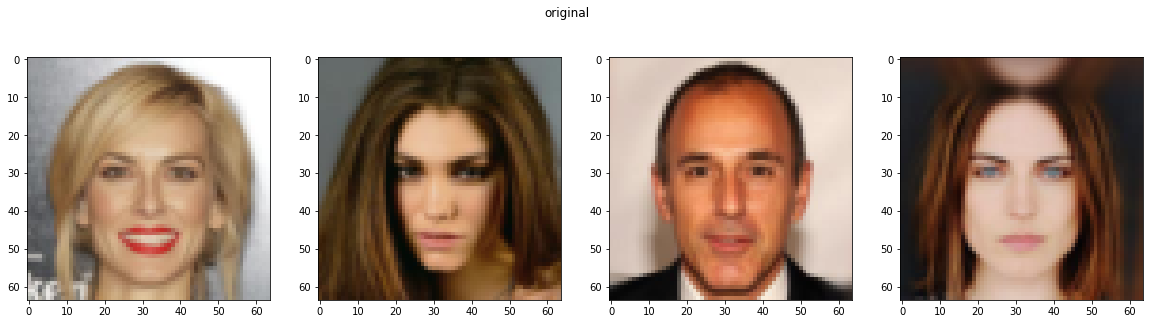

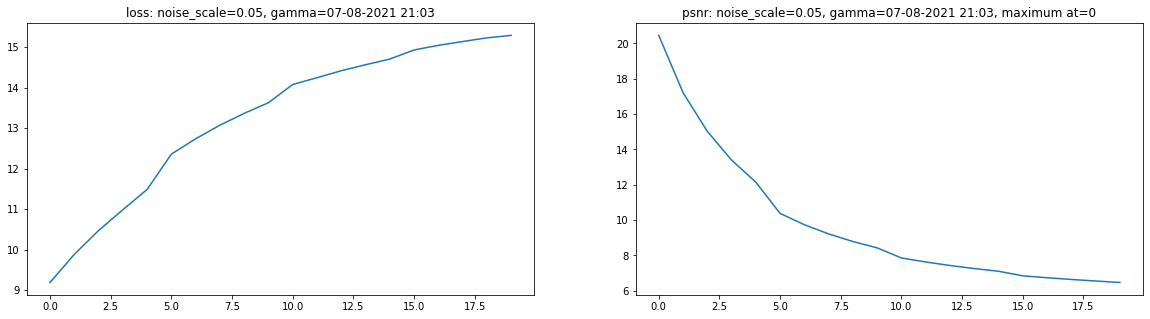

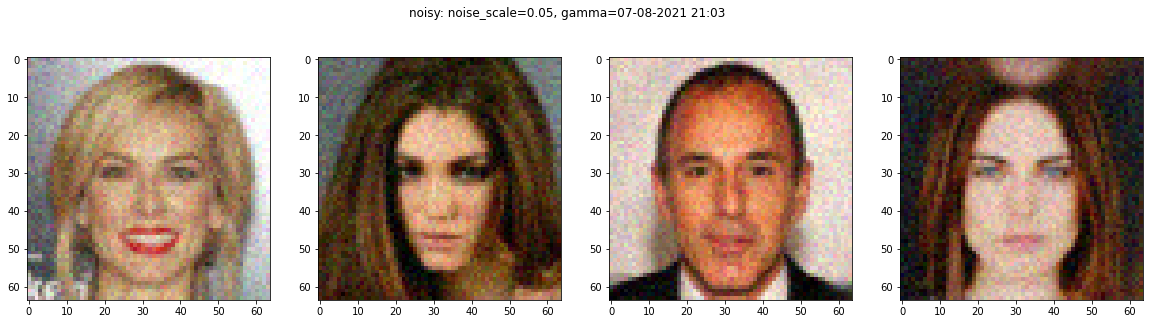

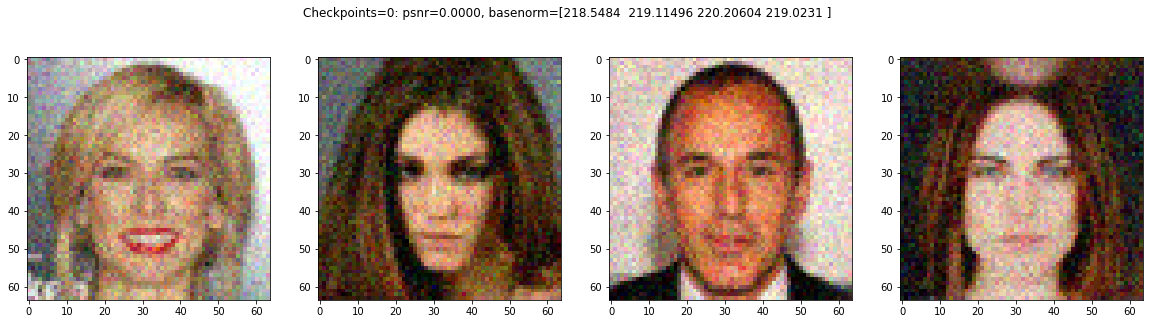

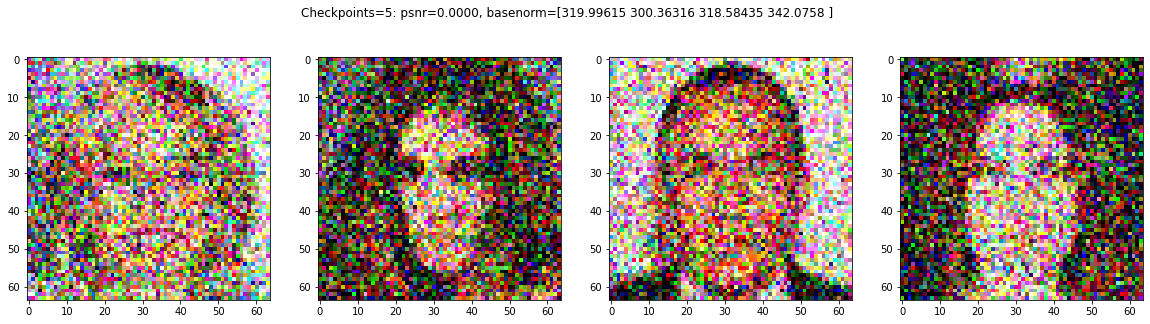

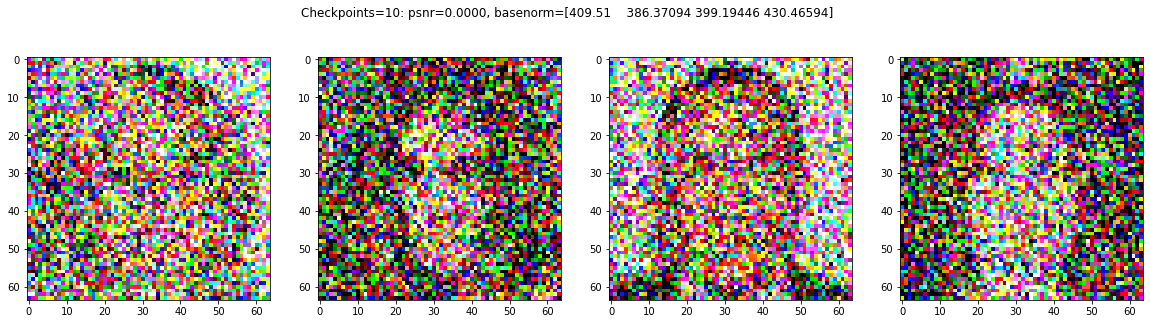

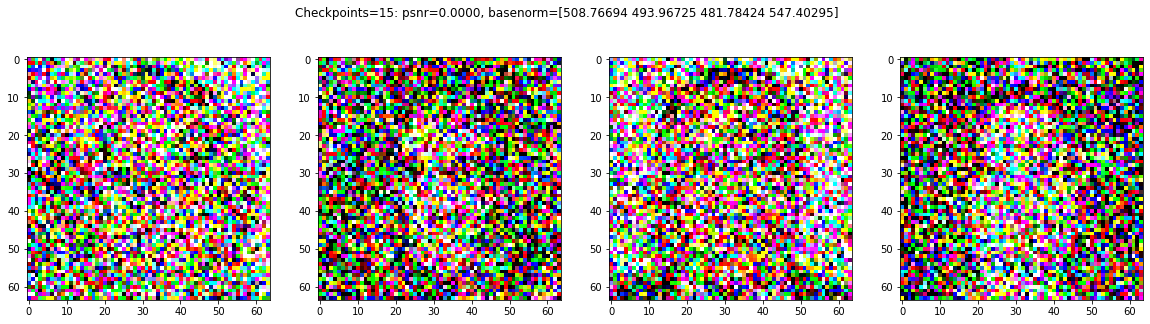

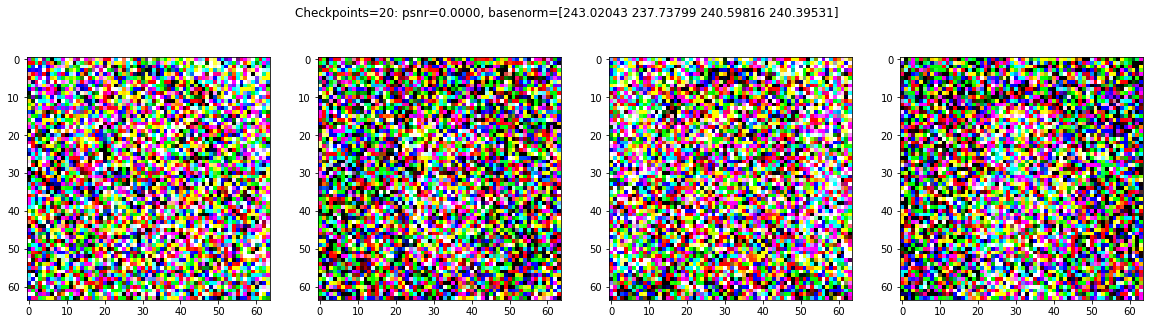

In [39]:
original_showed = False

for trial in results:
    gamma = trial.split('_')[5]
    noise_info = trial.split('_')[1]
    noise_loc, noise_scale = noise_info.split('#')
    noise, noisy, original, base_noisy, base_original, recovered_cps, base_cps, residual_curve, psnr_curve = load_trained(trial)
    print(f'noise_scale={noise_scale}, gamma={gamma}, basenorm_original={l2norm(base_original)}, basenorm_noisy={l2norm(base_noisy)}')

    if len(recovered_cps) > 0 and len(base_cps) > 0:
#         print(f'noise_scale={noise_scale}, gamma={gamma}, basenorm_original={l2norm(base_original)}, basenorm_noisy={l2norm(base_noisy)}')
        if not original_showed:
            fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
            for ori, ax in zip(original, axes):
                ax.imshow(ori.transpose(0, 1, 2))
            _ = plt.suptitle(f'original')
            _ = plt.show()
            original_showed = True
            
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
        _ = ax1.plot(residual_curve)
        _ = ax1.set_title(f'loss: noise_scale={noise_scale}, gamma={gamma}')

        _ = ax2.plot(psnr_curve)
        _ = ax2.set_title(f'psnr: noise_scale={noise_scale}, gamma={gamma}, maximum at={np.argmax(psnr_curve)}')
        _ = plt.show()
        
        fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
        for noisy, ax in zip(noisy, axes):
            ax.imshow(noisy.transpose(0, 1, 2))
        _ = plt.suptitle(f'noisy: noise_scale={noise_scale}, gamma={gamma}')
        _ = plt.show()
    
        recovered_cps.sort(key=lambda h: int(h.split('_')[-1].replace('.npy', '')))
        for recovered, base in zip(recovered_cps, base_cps):
            checkpoints = recovered.split('_')[-1].replace('.npy', '')
            recovered = np.load(recovered)
            base = np.load(base)
            
            psnr = [compare_psnr(x, y) for x,y in zip(original, recovered)]
            psnr = 0.
            fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
            for recover, ax in zip(recovered, axes):
                ax.imshow(recover.transpose(0, 1, 2))
            _ = plt.suptitle(f'Checkpoints={checkpoints}: psnr={np.mean(psnr):.4f}, basenorm={l2norm(base)}')
            _ = plt.show()
    else:
        print('Failed')
    print('\n' * 3)
        
    

In [53]:
import seaborn as sns 

(recovered[0] - noisy).flatten()

array([ 0.55642337, -0.16429451,  0.8685925 , ..., -0.22947738,
        0.43101832, -0.11460882], dtype=float32)

In [67]:
(recovered[3] - noisy).mean()

0.11102122

In [68]:
(recovered[3] - noisy).std()

0.47381386

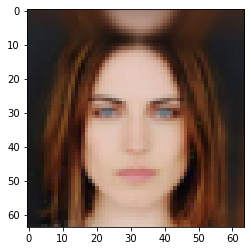

In [61]:
torch.stack([torch.eye(3), torch.eye(3)])

In [63]:
noise[-1]

array([[[ 0.03153764,  0.0152749 , -0.00192581],
        [ 0.00486585,  0.04034711,  0.04790376],
        [ 0.00159931, -0.02077975, -0.02977799],
        ...,
        [-0.04257306, -0.01330097, -0.0104954 ],
        [-0.02582332, -0.01017605, -0.03677094],
        [ 0.02597089,  0.03340858, -0.04021907]],

       [[-0.0459559 ,  0.02878946, -0.00499631],
        [-0.00534971,  0.02077547,  0.09469649],
        [-0.03550609, -0.06514136,  0.06671776],
        ...,
        [-0.03631746,  0.00057776,  0.10315696],
        [ 0.04434669, -0.01369774,  0.12798291],
        [-0.08475123, -0.04349218,  0.02254448]],

       [[-0.01983519, -0.02239566, -0.10338873],
        [-0.00338949,  0.02393839, -0.03235976],
        [ 0.0281456 , -0.02076956, -0.02673902],
        ...,
        [ 0.01195105, -0.02530671,  0.01083522],
        [ 0.03651183, -0.02707632, -0.03198573],
        [ 0.02972819, -0.00034228, -0.02616442]],

       ...,

       [[-0.02876784,  0.02054996, -0.00444006],
        [-0

In [70]:
import torch
import torch.nn as nn

vs = [nn.Parameter(torch.randn(4, 128), requires_grad=True) for _ in range(3)]
# vs

In [71]:
def householder_caster(b, n, device='cpu'):
    I = torch.eye(n, device=device, requires_grad=False)

    def compute_householder_matrix(vs):
        Qs = []
        for i in range(b):
            Q = torch.eye(n, device=device)
            for v in vs:
                vi = v[i].view(-1, 1)
                vi = vi / vi.norm()
                Qi = I - 2 * torch.mm(vi, vi.permute(1, 0))
                Q = torch.mm(Q, Qi)
            Qs.append(Q)
        return torch.stack(Qs)
    return compute_householder_matrix

In [72]:
h = householder_caster(4, 128, 'cpu')

In [74]:
x = torch.randn(4, 128, 1) * .1
x.std(1)

tensor([[0.0996],
        [0.0961],
        [0.1050],
        [0.1026]])

In [76]:
(h(vs) @ x).view(4, )

tensor([[0.0997],
        [0.0960],
        [0.1050],
        [0.1029]], grad_fn=<StdBackward1>)

In [ ]:
import seaborn as sns

In [ ]:
sns.distplot()